# Use deep learning to recognise LCD readings

## Train the text recognition model using <u>deep-text-recognition</u> ([github link](https://github.com/clovaai/deep-text-recognition-benchmark))
### Different settings and models were used to achieve best acuracy. The arguments are listed as follow:<br>
---
**Basic settings:**

|Command|help|Input|
|:---:|:---:|:---:|
|--exp_name|Where to store logs and models|Directory to store trained model|
|--train_data|required=True, path to training dataset|Directory of training dataset|
|--valid_data|required=True, path to validation dataset|Directory of training dataset|
|--manualSeed|type=int, default=1111|for random seed setting|
|--workers|type=int, number of data loading workers, default=4|int|
|--batch_size|type=int, default=192|input batch size|
|--num_iter|type=int, default=300000|number of iterations to train for|
|--valInterval|type=int, default=2000, Interval between each validation|int|
|--saved_model|default='', path of model to continue training|Directory|
|--FT|action='store_true', whether to do fine-tuning|No input, activates by include this argument|
|--adam|action='store_true', Whether to use adam (default is Adadelta)|No input|
|--lr|type=float, default=1, learning rate, default=1.0 for Adadelta|float|
|--beta1|type=float, default=0.9, beta1 for adam. default=0.9|float|
|--rho|type=float, default=0.95, decay rate rho for Adadelta. default=0.95|float|
|--eps|type=float, default=1e-8, eps for Adadelta. default=1e-8|float|
|--grad_clip| type=float, default=5, gradient clipping value. default=5|float|
|--baiduCTC| action='store_true', for data_filtering_off mode|No input|

---
**Data processing:**

|Command|help|Input|
|:---:|:---:|:---:|
|--select_data| type=str, default='MJ-ST', select training data (default is MJ-ST, which means MJ and ST used as training data|For use sample data|
|--batch_ratio| type=str, default='0.5-0.5', assign ratio for each selected data in the batch|Use with MJ-ST|
|--total_data_usage_ratio| type=str, default='1.0', total data usage ratio, this ratio is multiplied to total number of data.|For use part of data|
|--batch_max_length| type=int, default=25, maximum-label-length| |
|--imgH| type=int, default=32, the height of the input image|image size|
|--imgW| type=int, default=100, the width of the input image|image size|
|--rgb| action='store_true', use rgb input'|No input|
|--character| type=str, default='0123456789abcdefghijklmnopqrstuvwxyz', character label|To add or fileter symbols, characters|
|--sensitive| action='store_true', for sensitive character mode|Use this to recognise Upper case|
|--PAD| action='store_true', whether to keep ratio then pad for image resize| |
|--data_filtering_off| action='store_true', for data_filtering_off mode|No input|

---
**Model Architecture:**

|Command|help|Input|
|:---:|:---:|:---:|
|--Transformation| type=str, required=True, Transformation stage. |None or TPS|
|--FeatureExtraction| type=str, required=True, FeatureExtraction stage. |VGG, RCNN or ResNet|
|--SequenceModeling| type=str, required=True, SequenceModeling stage. |None or BiLSTM|
|--Prediction| type=str, required=True, Prediction stage. |CTC or Attn|
|--num_fiducial| type=int, default=20, number of fiducial points of TPS-STN|int|
|--input_channel| type=int, default=1, the number of input channel of Feature extractor|int|
|--output_channel| type=int, default=512, the number of output channel of Feature extractor|int|
|--hidden_size| type=int, default=256, the size of the LSTM hidden state|int|

### Train the models
The variables used will be:

|Model|Experiment Name|Command used|
|:---:|:---:|:---:|
|VGG | vgg-notran-nolstm-ctc | CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name vgg-notran-nolstm-ctc \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction VGG --SequenceModeling None --Prediction CTC \ --num_iter 10000 --valInterval 1000 |
|VGG | vgg-tps-nolstm-ctc| CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name vgg-tps-nolstm-ctc \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation TPS --FeatureExtraction VGG --SequenceModeling None --Prediction CTC \ --num_iter 10000 --valInterval 1000 |
|VGG |vgg-notran-nolstm-attn|CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name vgg-notran-nolstm-attn \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction VGG --SequenceModeling None --Prediction Attn \ --num_iter 10000 --valInterval 1000|
|RCNN | rcnn-notran-nolstm-ctc | CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name rcnn-notran-nolstm-ctc \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction RCNN --SequenceModeling None --Prediction CTC \ --num_iter 10000 --valInterval 1000 |
|RCNN | rcnn-notran-nolstm-atnn | CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name rcnn-notran-nolstm-atnn \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction RCNN --SequenceModeling None --Prediction Attn \ --num_iter 10000 --valInterval 1000 |
|ResNet | resnet-notran-nolstm-ctc | CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name resnet-notran-nolstm-ctc \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction ResNet --SequenceModeling None --Prediction CTC \ --num_iter 10000 --valInterval 1000 |
|ResNet | resnet-notran-nolstm-atnn | CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name resnet-notran-nolstm-atnn \ --train_data result/train --valid_data result/test --batch_size 200 \ --Transformation None --FeatureExtraction ResNet --SequenceModeling None --Prediction Attn \ --num_iter 10000 --valInterval 1000 |

### Experiment checklist

In [1]:
from IPython.display import display
from ipywidgets import Checkbox

box1 = Checkbox(False, description='vgg-notran-nolstm-ctc')
box2 = Checkbox(False, description='vgg-notran-nolstm-attn')
box3 = Checkbox(False, description='rcnn-notran-nolstm-ctc')
box4 = Checkbox(False, description='rcnn-notran-nolstm-atnn')
box5 = Checkbox(False, description='resnet-notran-nolstm-ctc')
box6 = Checkbox(False, description='resnet-notran-nolstm-atnn')
display(box1,box2,box3,box4,box5,box6)

def changed(b):
    print(b)

box1.observe(changed)
box2.observe(changed)
box3.observe(changed)
box4.observe(changed)
box5.observe(changed)
box6.observe(changed)

Checkbox(value=False, description='vgg-notran-nolstm-ctc')

Checkbox(value=False, description='vgg-notran-nolstm-attn')

Checkbox(value=False, description='rcnn-notran-nolstm-ctc')

Checkbox(value=False, description='rcnn-notran-nolstm-atnn')

Checkbox(value=False, description='resnet-notran-nolstm-ctc')

Checkbox(value=False, description='resnet-notran-nolstm-atnn')

### Experiment summary
By using ResNet (no Transformation, no BiLTSM) with ctc prediction, an prediction accuracy of over 98 % was achieved.

|Model|Exp Name|Accuracy|
|:---:|:---:|:---:|
|VGG | vgg-notran-nolstm-ctc |90.837|
|VGG | vgg-tps-nolstm-ctc|64.542|
|VGG |vgg-notran-nolstm-attn|86.853|
|RCNN | rcnn-notran-nolstm-ctc |80.080|
|RCNN | rcnn-notran-nolstm-atnn | - |
|ResNet | resnet-notran-nolstm-ctc |<mark>98.805</mark>|
|ResNet | resnet-notran-nolstm-atnn |94.422|

Command to train ResNet with a batch size of 50:

```
!CUDA_VISIBLE_DEVICES=0 python3 train.py --exp_name resnet-notran-nolstm-ctc-bs50 \
--train_data result/train --valid_data result/test --batch_size 50 \
--Transformation None --FeatureExtraction ResNet --SequenceModeling None --Prediction CTC \
--num_iter 10000 --valInterval 1000 \
--saved_model saved_models/resnet-notran-nolstm-ctc/best_accuracy.pth
```

### Predict readings from trained model

In [1]:
%cd /mnt/c/Users/stcik/scire/papers/muon/deep-text-recognition-benchmark

/mnt/c/Users/stcik/scire/papers/muon/deep-text-recognition-benchmark


In [2]:
# Predict 90C data
output = !python3 predict.py \
--Transformation None --FeatureExtraction ResNet --SequenceModeling None --Prediction CTC \
--image_folder 90C/ --batch_size 400 \
--saved_model resnet-notran-nolstm-ctc-50bs.pth

In [6]:
output

['No Transformation module specified',
 'No SequenceModeling module specified',
 'model input parameters 32 100 20 1 512 256 12 25 None ResNet None CTC',
 'loading pretrained model from resnet-notran-nolstm-ctc-50bs.pth',
 '--------------------------------------------------------------------------------',
 'image_path               \tpredicted_labels         \tconfidence score',
 '--------------------------------------------------------------------------------',
 '90C/90C_00001.jpg        \t90.6                     \t0.9260',
 '90C/90C_00002.jpg        \t90.2                     \t0.4132',
 '90C/90C_00003.jpg        \t90.4                     \t0.4597',
 '90C/90C_00004.jpg        \t90.4                     \t0.6889',
 '90C/90C_00005.jpg        \t89.9                     \t0.8157',
 '90C/90C_00006.jpg        \t89.4                     \t0.8915',
 '90C/90C_00007.jpg        \t89.4                     \t0.8893',
 '90C/90C_00008.jpg        \t88.9                     \t0.6254',
 '90C/90C_000

In [3]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from cycler import cycler
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Sans",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.subplot.left": 0.21,
    "figure.subplot.right": 0.96,
    "figure.subplot.bottom": 0.18,
    "figure.subplot.top": 0.93,
    "legend.frameon": False,
})
params= {'text.latex.preamble' : [r'\usepackage{amsmath, amssymb, unicode-math}',
                                  r'\usepackage[dvips]{graphicx}',
                                  r'\usepackage{xfrac}', r'\usepackage{amsbsy}']}

In [7]:
data = pd.DataFrame()
for ind, row in enumerate(output[
    output.index('image_path \tpredicted_labels \tconfidence score')+2:
]):
    row = row.split('\t')
    filename = row[0].strip()
    label = row[1].strip()
    conf = row[2].strip()
    img = Image.open(filename)
    img_buffer = io.BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

    data.loc[ind, 'Image'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
    data.loc[ind, 'File name'] = filename
    data.loc[ind, 'Reading'] = label
    data.loc[ind, 'Confidence'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))

ValueError: 'image_path \tpredicted_labels \tconfidence score' is not in list

### Visualise the predicted data, correct wrong readings and calculate the average and error off the readings.

Correct the readings

In [9]:
# Convert data from string to float
data['Reading']=data['Reading'].astype(float)
# selecting rows based on condition
rslt_df = data[(data['Reading'] < 85) | (data['Reading'] > 95)]
html_failed = rslt_df.to_html(escape=False)
display(HTML(html_failed))

,Image,File name,Reading,Confidence


In [ ]:
data['Reading'].to_excel("90C_readings.xlsx")

There are no wrong predictions, we can directly plot the data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

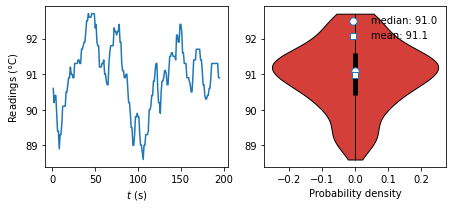

In [24]:
fig, ax = plt.subplots(1,2,figsize=(6.4,3),tight_layout=True)

time = range(1,196)
num_bins = 20

# the histogram of the data
ax[0].plot(time,data['Reading'])
ax[0].set_xlabel('$t$ (s)')
ax[0].set_ylabel('Readings ($\degree$C)')

violin_data = [sorted(data['Reading'])]

parts = ax[1].violinplot(violin_data, positions=[0],
                         showmeans=False, showmedians=False, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(violin_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(violin_data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
mean=np.mean(violin_data)
inds = np.arange(0, len(medians))
ax[1].scatter(inds, medians, marker='o', edgecolors='tab:blue',
              c='white', s=55, zorder=3, label = f'median: %.1f'% mean)
ax[1].scatter(inds, mean, marker='s', edgecolors='tab:blue',
              c='white', s=45, zorder=4, label = f'mean: %.1f'% medians)
ax[1].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax[1].vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
ax[1].set_xlabel('Probability density')
ax[1].legend(frameon=False, loc=0)
plt.savefig('90C_prediction.eps')
plt.show()